In [3]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest

In [4]:
dt = fetch_california_housing()
dt

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [5]:
ch_dt = pd.DataFrame(dt.data,columns=dt.feature_names)
ch_dt.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
dt.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [67]:
x = dt['data']
y = dt['target']
feature_names = dt['feature_names']

In [26]:
x.shape

(20640, 8)

# Filter Based Methods 

## 1. Mutual Information 

In [27]:
from sklearn.feature_selection import mutual_info_regression, SelectPercentile, SelectKBest
mi = mutual_info_regression(x, y)

In [28]:
mi

array([0.38722528, 0.0348523 , 0.10297817, 0.02372443, 0.02095336,
       0.0732186 , 0.37176536, 0.40085413])

In [29]:
mi_f = pd.DataFrame({
    'Feature Name': feature_names,
    'Dependence': mi})
mi_f

,Feature Name,Dependence
0,MedInc,0.387225
1,HouseAge,0.034852
2,AveRooms,0.102978
3,AveBedrms,0.023724
4,Population,0.020953
5,AveOccup,0.073219
6,Latitude,0.371765
7,Longitude,0.400854


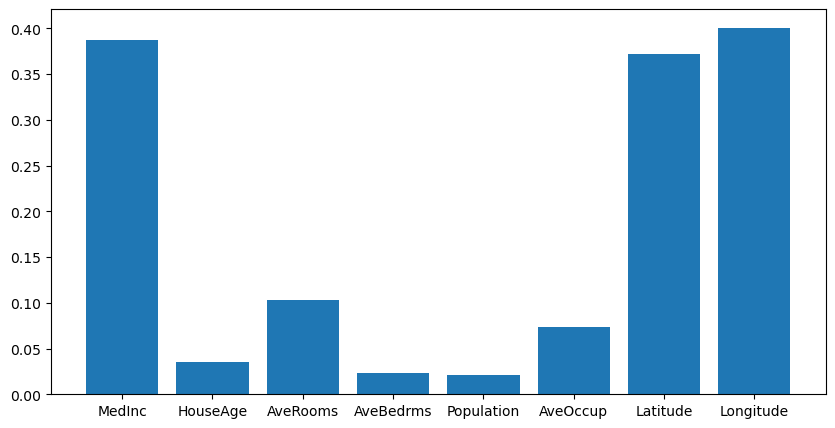

In [30]:
#Let's visualise the dependence 
plt.figure(figsize=(10, 5))
plt.bar(feature_names, mi)
plt.show()

In [11]:
#Finding best R2Score using feature selection with LinearRegression model.

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List to store the R^2 scores & mse for different values of k
scores = []

# Iterate over k from 2 to 8
for k in range(2, 9):
    # Apply SelectKBest
    selector = SelectKBest(mutual_info_regression, k=k)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(x_train_selected, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_selected)
    
    # Calculate the R^2 score & mse
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    # Store the R^2 score & mse 
    scores.append((k, r2,mse))

df_k = pd.DataFrame(scores, columns=['KBest', 'R^2 Score', 'MSE'])

# Display the DataFrame
print(df_k)

   KBest  R^2 Score       MSE
0      2   0.460387  0.707114
1      3   0.572055  0.560783
2      4   0.572359  0.560385
3      5   0.573265  0.559198
4      6   0.582308  0.547348
5      7   0.582324  0.547326
6      8   0.575788  0.555892


## 2. Pearson Correlation 

In [13]:
# 1. Analyse the relationship between 'each' individual feature (input) and output

In [58]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# List to store the R^2 scores & mse for different values of k
scores = []

# Iterate over k from 2 to 8
for k in range(2, 9):
    # Apply SelectKBest
    selector = SelectKBest(f_regression, k=k)
    x_train_selected = selector.fit_transform(x_train, y_train)
    x_test_selected = selector.transform(x_test)
    
    # Train a linear regression model
    model = LinearRegression()
    model.fit(x_train_selected, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test_selected)
    
    # Calculate the R^2 score & mse
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    # Store the R^2 score & mse
    scores.append((k, r2,mse))

df_k = pd.DataFrame(scores, columns=['KBest', 'R^2 Score', 'MSE'])

# Display the DataFrame
print(df_k)

   KBest  R^2 Score       MSE
0      2   0.464171  0.702155
1      3   0.470251  0.694188
2      4   0.504317  0.649548
3      5   0.512933  0.638257
4      6   0.574969  0.556964
5      7   0.575092  0.556803
6      8   0.575788  0.555892


In [33]:
# 2. Analyze relationship b/w the features themselves.

In [34]:
ch_dt.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


<Axes: >

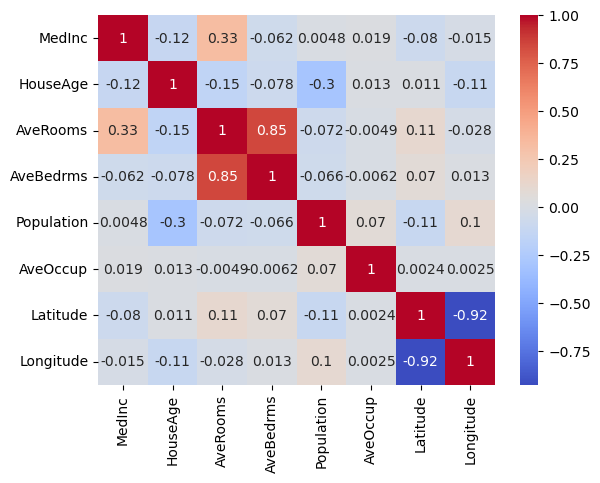

In [35]:
import seaborn as sns
sns.heatmap(ch_dt.corr(),annot=True,cmap="coolwarm")

In [ ]:
# Obseravtions on the basis of the heatmap :
# 1. AveBedrms has a higher correlation with AveRooms.
# 2. In comparison, AveRooms has higher correlation with the target than AveBedrms. Therefore AveBedrms can be removed.
# 3. AveOccup shows low contribution with other features. 
# 4. Population shows low correlation with other features. 

In [47]:
x_new = ch_dt.drop(['AveBedrms','AveOccup','Population'], axis=1)
x_new.head()

,MedInc,HouseAge,AveRooms,Latitude,Longitude
0,8.3252,41.0,6.984127,37.88,-122.23
1,8.3014,21.0,6.238137,37.86,-122.22
2,7.2574,52.0,8.288136,37.85,-122.24
3,5.6431,52.0,5.817352,37.85,-122.25
4,3.8462,52.0,6.281853,37.85,-122.25


In [ ]:
# Observation : With 6 features (MedInc	HouseAge	AveRooms	Population	Latitude	Longitude) - R2score is 0.5814132.
# If Population is removed then the R2score is 0.5813744

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

R2score =  0.5813744243302476
MSE =  0.5485707128789087


# Wrapper Based Methods

## RFE

In [58]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import Lasso
estimator = Lasso()
x_new = RFE(estimator, n_features_to_select=5, step=1).fit_transform(x, y)
print(x_new.shape)

(20640, 5)


In [59]:
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

R2score =  0.5811157560182503
MSE =  0.5489096741573364


In [68]:
print(x.shape)

(20640, 8)


In [69]:
# Looping through the range of features. 
for k in range(1, x.shape[1]+1):
    estimator = Lasso()
    selector = RFE(estimator, n_features_to_select=k, step=1)
    x_new = selector.fit_transform(x, y)
    x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Features: {k}; R2 = {r2_score(y_test, y_pred)}')

Features: 1; R2 = 0.45885918903846656
Features: 2; R2 = 0.4940606792889837
Features: 3; R2 = 0.4953076598494679
Features: 4; R2 = 0.49559608846973724
Features: 5; R2 = 0.5811157560182503
Features: 6; R2 = 0.5820217896973205
Features: 7; R2 = 0.5799358837198192
Features: 8; R2 = 0.5757877060324528


## Select from Model

In [39]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
print("Or_shape =", x.shape) 
lass = Lasso().fit(x, y)
model = SelectFromModel(lass, prefit=True)
x_new = model.transform(x)
print("New_shape =",x_new.shape)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

Or_shape = (20640, 8)
New_shape = (20640, 2)
R2score =  0.4940606792889837
MSE =  0.6629874283048177


## Sequential Feature Selection 

In [19]:
#Forward
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
ridge = RidgeCV().fit(x, y)
sfs_forward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="forward"
).fit(x, y)

print(sfs_forward)
x_new = sfs_forward.transform(x)
x_new.shape
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

SequentialFeatureSelector(estimator=RidgeCV(), n_features_to_select='auto')
R2score =  0.5088800081000429
MSE =  0.6435680467793017


In [20]:
#Backward
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import RidgeCV
ridge = RidgeCV().fit(x, y)
sfs_backward = SequentialFeatureSelector(
    ridge, n_features_to_select="auto", direction="backward"
).fit(x, y)

print(sfs_backward)
x_new = sfs_backward.transform(x)
x_new.shape
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2,random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

SequentialFeatureSelector(direction='backward', estimator=RidgeCV(),
                          n_features_to_select='auto')
R2score =  0.5810616616067183
MSE =  0.5489805599598805


## Embedded Methods 

In [83]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = Lasso()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

R2score =  0.2841671821008396
MSE =  0.9380337514945428


## PCA 

In [96]:
#LinearRegressor
print("Or_shape =", x.shape) 
from sklearn.decomposition import PCA
x_new = PCA(n_components=8, svd_solver='full').fit_transform(x)
print("New_shape =",x_new.shape)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

Or_shape = (20640, 8)
New_shape = (20640, 8)
R2score =  0.575787706032451
MSE =  0.5558915986952442


In [95]:
#RandomForest 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.decomposition import PCA
x_new = PCA(n_components=8, svd_solver='full').fit_transform(x)
print("New_shape =",x_new.shape)
x_train, x_test, y_train, y_test = train_test_split(x_new, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print("R2score = ", r2_score(y_test, y_pred))
print("MSE = ", mean_squared_error(y_test, y_pred))

New_shape = (20640, 8)
R2score =  0.7615593359307118
MSE =  0.31245478697411766
